In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/data.csv",
                 parse_dates=['Fecha'],
                 index_col='Fecha')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152 entries, 2007-05-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Desembolso  152 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

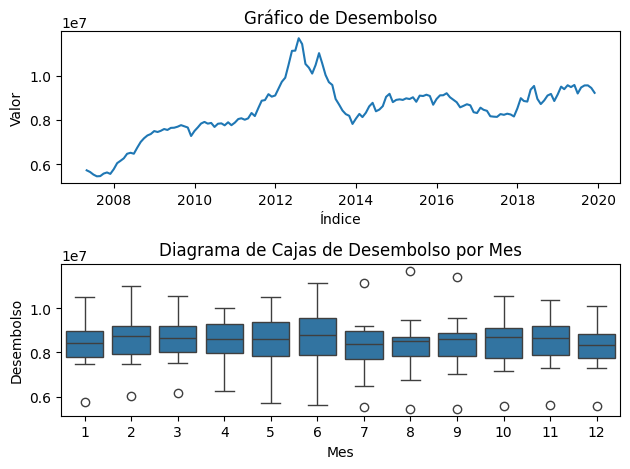

In [18]:
# Configurar la disposición de los subgráficos
plt.subplot(2, 1, 1)

# Crear el primer gráfico
plt.plot(df["Desembolso"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico de Desembolso')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Cambiar a la siguiente celda de la cuadrícula
plt.subplot(2, 1, 2)

# Crear un diagrama de cajas para cada mes
sns.boxplot(x=df.index.month, y=df['Desembolso'])

# Configurar el título y etiquetas del eje
plt.title('Diagrama de Cajas de Desembolso por Mes')
plt.xlabel('Mes')
plt.ylabel('Desembolso')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Descomposición multiplicativa:

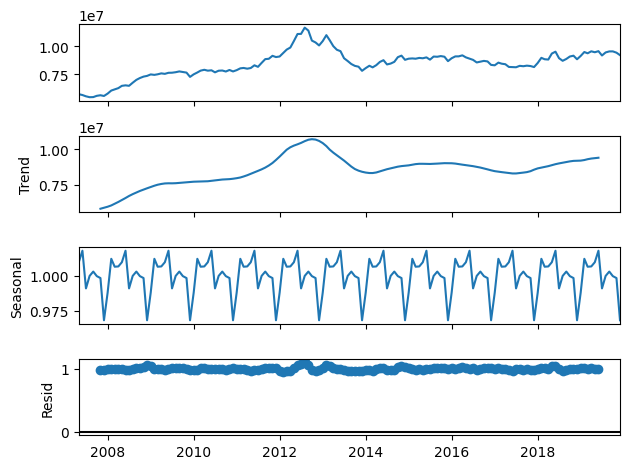

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decomposed = seasonal_decompose(
    df,
    model='mul'
)

df_decomposed.plot()
plt.show()

Descomposición aditiva:

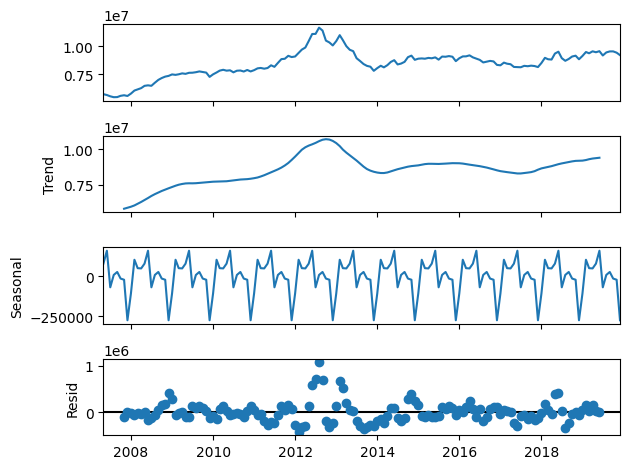

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decomposed = seasonal_decompose(
    df,
    model='add'
)

df_decomposed.plot()
plt.show()

Descomposición mostrada de manera aislada:

<Axes: xlabel='Fecha'>

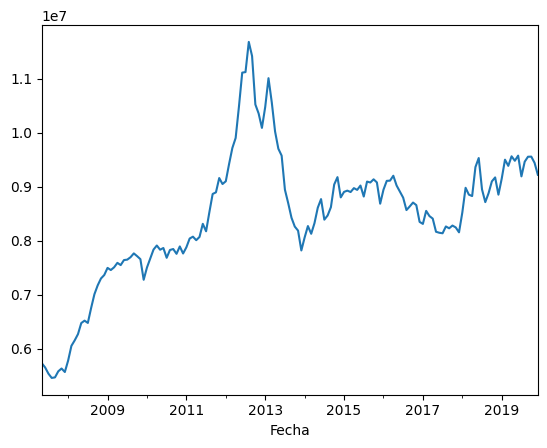

In [9]:
observada = df_decomposed.observed
observada.plot()

<Axes: xlabel='Fecha'>

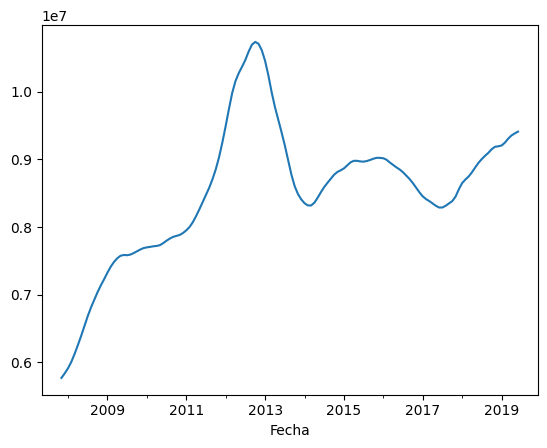

In [10]:
tendencia = df_decomposed.trend
tendencia.plot()

<Axes: xlabel='Fecha'>

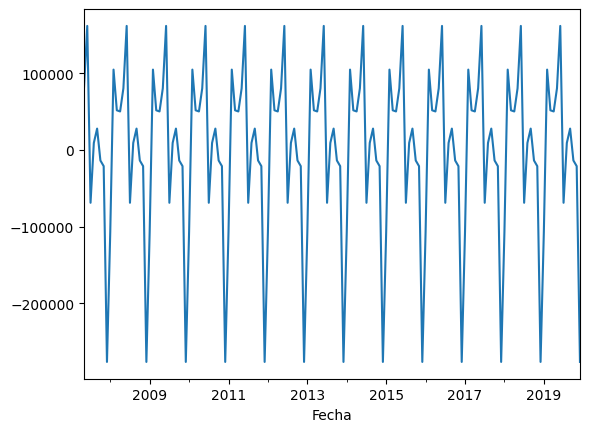

In [11]:
estacionalidad = df_decomposed.seasonal
estacionalidad.plot()

<Axes: xlabel='Fecha'>

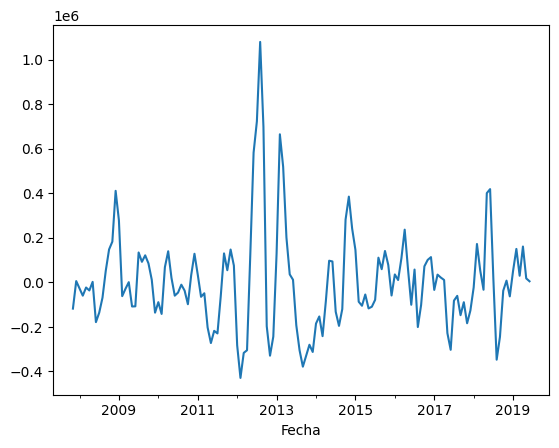

In [12]:
residuos = df_decomposed.resid
residuos.plot()

Componentes de una serie temporal:

In [14]:
componentes = pd.concat([observada, tendencia, estacionalidad, residuos], axis=1)
componentes

,0,trend,seasonal,resid
Fecha,,,,
2007-05-01,5730247.11,NaN,80638.216356,NaN
2007-06-01,5653574.84,NaN,162073.618717,NaN
2007-07-01,5538662.04,NaN,-68848.492129,NaN
2007-08-01,5459529.79,NaN,9313.562189,NaN
2007-09-01,5469237.72,NaN,27991.984613,NaN
...,...,...,...,...
2019-08-01,9462968.65,NaN,9313.562189,NaN
2019-09-01,9554313.57,NaN,27991.984613,NaN
2019-10-01,9556565.97,NaN,-13605.690728,NaN


Estabilización de la variabilidad de la serie temporal:

In [20]:
df['log_Desembolso'] = np.log(df['Desembolso'])

<Axes: xlabel='Fecha'>

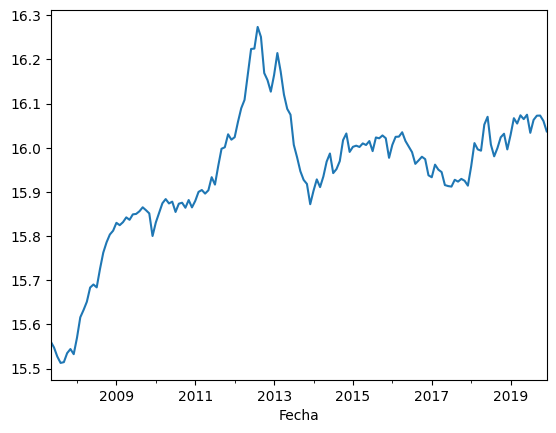

In [21]:
df['log_Desembolso'].plot()

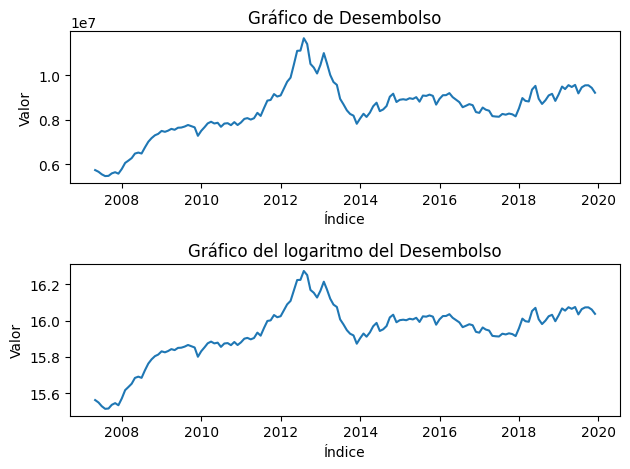

In [22]:
# Configurar la disposición de los subgráficos
plt.subplot(2, 1, 1)

# Crear el primer gráfico
plt.plot(df["Desembolso"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico de Desembolso')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Cambiar a la siguiente celda de la cuadrícula
plt.subplot(2, 1, 2)

# Crear el segundo gráfico
plt.plot(df["log_Desembolso"])

# Configurar el título y etiquetas del eje
plt.title('Gráfico del logaritmo del Desembolso')
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Primera diferencia de la serie temporal:

<Axes: xlabel='Fecha'>

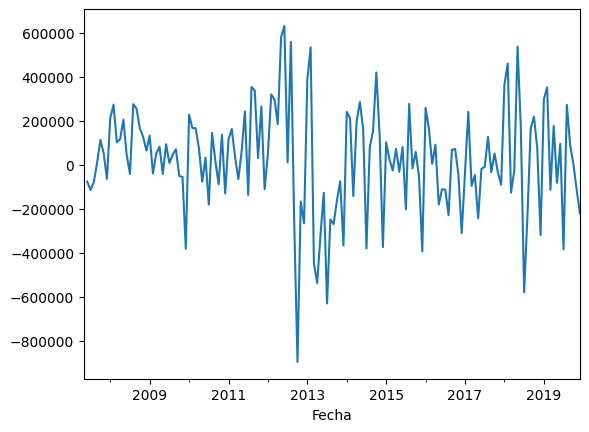

In [26]:
# Calcular la primera diferencia de la columna 'Desembolo'
df['Desembolso_1raDiferencia'] = df['Desembolso'].diff()

# Mostrar la primera diferencia
df['Desembolso_1raDiferencia'].plot()

Eliminando estacionalidad de la serie:

<Axes: xlabel='Fecha'>

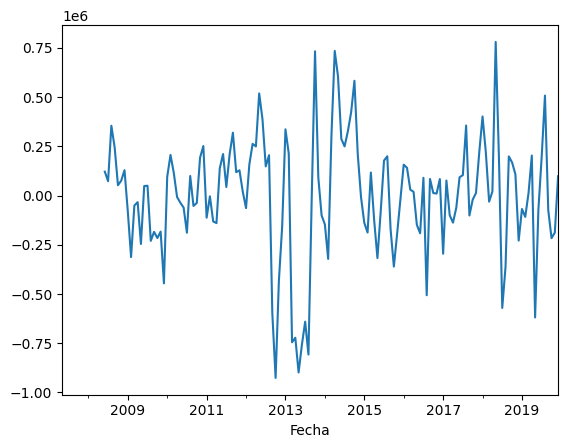

In [28]:
# Calcular la diferencia entre cada valor y el valor que está 12 pasos atrás
df['tsstationary'] = df['Desembolso_1raDiferencia'].diff(periods=12)
df['tsstationary'].plot()